# **Customer Churn in Telecom**

## **Problem Statement**

**Objective**

The objective of this project is to analyze customer data from a telecom company to understand the factors that lead to customer churn.

Goals:
- Perform Exploratory Data Analysis (EDA)
- Identify patterns and key drivers of churn
- Build a machine learning model to predict customer churn

Business Impact:
Reducing churn helps improve customer retention and revenue.

## **Import Libraries**

In [1]:
#Data Handling
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Warning
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

## **Load The Data**

**Mount Drive**

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load CSV**

In [3]:
file_path = "/content/drive/Othercomputers/SAGAR LAPTOP DATA/DATA SCIENCE/Projects/Machine-Learning-Portfolio/03_ML_Practice/Customer Churn in Telecom/raw_data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

Update the file path based on your Drive location.

## **Know Your Data**

### **First View Of The Data**

First 5 rows

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Last 5 rows

In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### **Shape & Size Of Data**

In [6]:
#shape of data

df.shape

(7043, 21)

The dataset has :

Columns - 21 & Rows - 7043

In [7]:
#size of the data
df.size

147903

### **Columns in Data**

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### **Data Information**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **Missing Values In Data**

In [10]:
#Missing values in data
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### **Statistical Summary Of The Data**

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### **Duplicate Rows In Data**

In [14]:
#duplicate rows in data
df.duplicated().sum()

np.int64(0)

### **Unique Values In Data**

In [15]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col} -> {df[col].nunique()} unique values")


customerID -> 7043 unique values
gender -> 2 unique values
Partner -> 2 unique values
Dependents -> 2 unique values
PhoneService -> 2 unique values
MultipleLines -> 3 unique values
InternetService -> 3 unique values
OnlineSecurity -> 3 unique values
OnlineBackup -> 3 unique values
DeviceProtection -> 3 unique values
TechSupport -> 3 unique values
StreamingTV -> 3 unique values
StreamingMovies -> 3 unique values
Contract -> 3 unique values
PaperlessBilling -> 2 unique values
PaymentMethod -> 4 unique values
TotalCharges -> 6531 unique values
Churn -> 2 unique values


### **Final Observation - Know Your Data**


**Dataset Structure**

7043 rows, 21 columns

Mix of categorical and numerical features

Target variable: Churn (Binary)

**Data Quality**

No missing values

No duplicate rows

Data structurally clean

Data Type Issues Identified

TotalCharges originally object → converted to numeric

SeniorCitizen is numeric (0/1) but logically categorical

customerID is an identifier → not useful for modeling

**Feature Nature**

Most categorical columns have 2–3 unique values → manageable encoding

PaymentMethod has 4 categories

TotalCharges is continuous numeric

Dataset is suitable for classification

## **Data Cleaning**

### **Dropping CustomerID Column**

In [17]:
#droping column
df.drop('customerID',axis=1,inplace=True)

### **Convert Datatypes**

#### **Convert TotalCharges to Numeric**

In [19]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Check

In [20]:
df['TotalCharges'].isnull().sum()

np.int64(11)

11 rows became NaN after conversion

Those rows likely had blank spaces " " in original data


#### **Convert SeniorCitizen to Categorical**

In [21]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

#### **Final Check**

In [22]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


### **Dropping Null Rows**

In [23]:
#Check rows
df['TotalCharges'].isnull().sum()

np.int64(11)

In [24]:
#dropping rows
df = df.dropna(subset=['TotalCharges'])

**Check**

In [ ]:
df.isnull().sum()


In [28]:
df.shape

(7032, 20)

### **Standardize Column Names**

In [29]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
#Standardizing Columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

### **Final Summary - Data Cleaning**

During the data cleaning phase, we performed the following steps:

Removed customerID as it is a unique identifier and not useful for analysis or modeling.

Converted TotalCharges from object to numeric datatype.

Identified and removed 11 rows with invalid or blank TotalCharges values.

Converted SeniorCitizen from numeric (0/1) to categorical type.

Standardized all column names to lowercase and snake_case format.

Revalidated dataset to ensure:

No missing values

No duplicate rows

Correct data types

Final shape: (7032, 20)

Dataset is now clean and ready for Exploratory Data Analysis (EDA).

## **Data Visualization**

### **Univariate Analysis**

#### **Chart 1. Churn Distribution - (Target Variable)**

**Value Count**

In [31]:
df['churn'].value_counts()

,count
churn,
No,5163
Yes,1869


**Percentage Distribution**

In [32]:
df['churn'].value_counts(normalize=True) * 100

,proportion
churn,
No,73.421502
Yes,26.578498


**Count Plot**

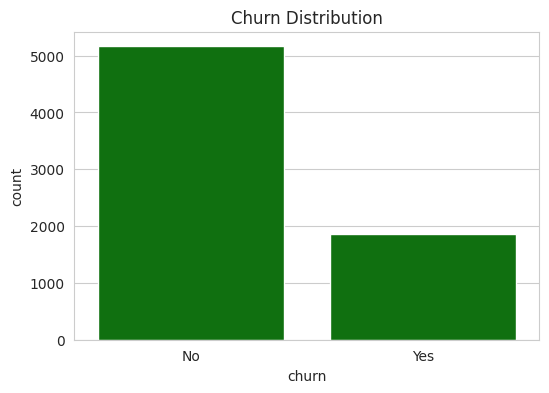

In [34]:
# Chart No.1 : Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df,color='green')
plt.title("Churn Distribution")
plt.show()

##### **Insight**

* Majority customers are Non-Churn (No).

* Churn rate is significantly lower than retention.

* Dataset is class imbalanced (more No than Yes).

* Approx churn rate ≈ 26–27% (business concern level).

* ***Imbalance important for future modeling (may need handling).***

#### **Chart 2. Tenure Distribution**

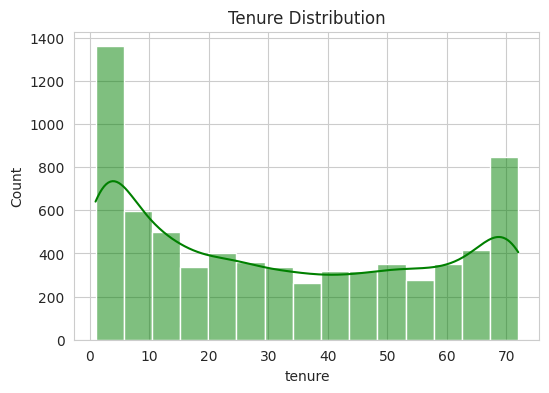

In [35]:
# Chart No.2 : Tenure Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['tenure'], kde=True, color='green')
plt.title("Tenure Distribution")
plt.show()

##### **Insight**

* Distribution is bimodal / U-shaped.

* High concentration at:

  * Very low tenure (0–5 months)

  * Very high tenure (65–72 months)

* Many customers leave early OR stay very long.

* Indicates possible:

  * Early dissatisfaction

  * Strong long-term loyalty group

* ***Early months may be critical for churn prevention.***

#### **Chart 3. Monthly Charges Distribution**

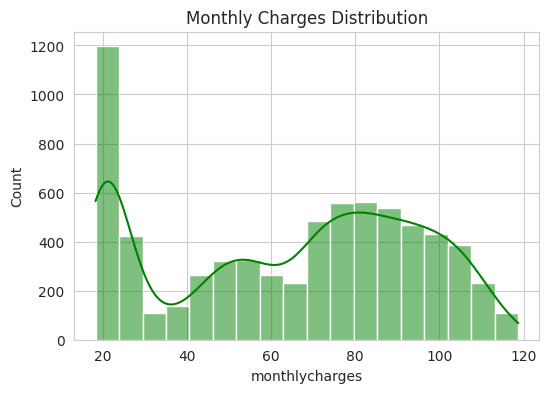

In [36]:
#Chart No.3 : Monthly Charges Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['monthlycharges'], kde=True, color='green')
plt.title("Monthly Charges Distribution")
plt.show()

##### **Insight**

* Distribution is right-skewed / multi-peaked.

* Large cluster around $20–30 (basic plans).

* Another concentration around $70–100 (premium plans).

* Wide price variation → different service bundles.

* ***Possible that higher charges influence churn (to verify in bivariate).***

#### **Chart 4. Total Charges Distribution**

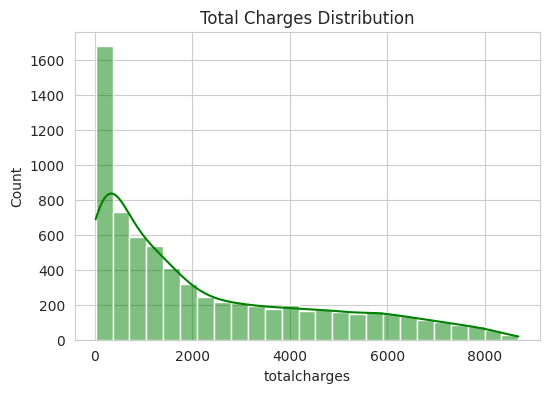

In [37]:
# Chart No.4 : Total Charges Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['totalcharges'], kde=True, color='green')
plt.title("Total Charges Distribution")
plt.show()


##### **Insight**

*  Distribution is highly right-skewed.

*  Majority customers have low total charges.

*  Few customers with very high total charges (long tenure customers).

*  Strong relationship likely between:

  * `tenure`

  * `monthlycharges`

  * `totalcharges`

* ***Outliers exist but logically valid (long-term high-paying customers).***

#### **Chart 5. Gender Distribution**

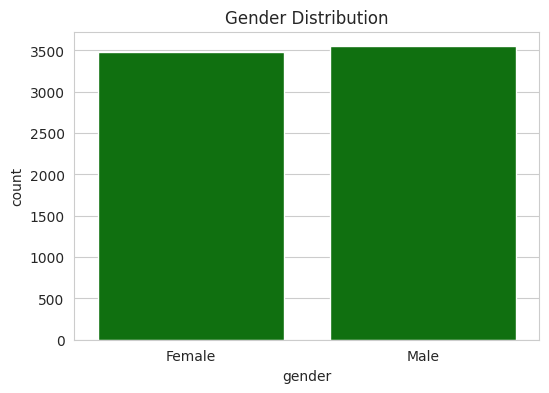

In [38]:
# Chart No. 5 – Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='gender', data=df, color='green')
plt.title("Gender Distribution")
plt.show()

##### **Insight**

*  Distribution is almost perfectly balanced.

*  Male and Female customers are nearly equal.

*  No sampling bias in gender representation.

*  ***Gender alone unlikely to explain churn (to verify in bivariate).***

#### **Chart 6. Senior Citizen Distribution**

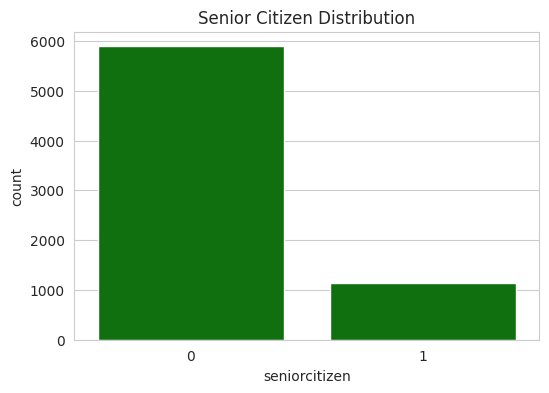

In [39]:
# Chart No. 6 – Senior Citizen Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='seniorcitizen', data=df, color='green')
plt.title("Senior Citizen Distribution")
plt.show()

##### **Insight**

*  Majority customers are non-senior citizens (0).

*  Senior citizens form a small portion (~16%).

*  Dataset is imbalanced for this feature.

*  ***Senior segment is smaller but may have distinct churn behavior (to verify later).***

#### **Chart 7. Partner Distribution**

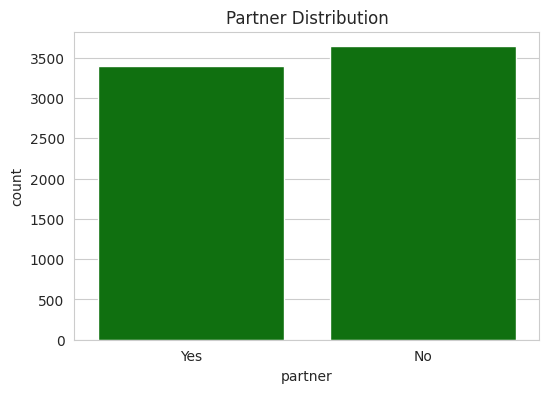

In [40]:
# Chart No. 7 – Partner Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='partner', data=df, color='green')
plt.title("Partner Distribution")
plt.show()

##### **Insight**

*  Distribution is relatively balanced.

*  Slightly more customers do not have a partner.

*  No major skew in this feature.

*  ***Partner status may influence stability/tenure (to verify in bivariate).***

#### **Chart 8. Dependents Distribution**

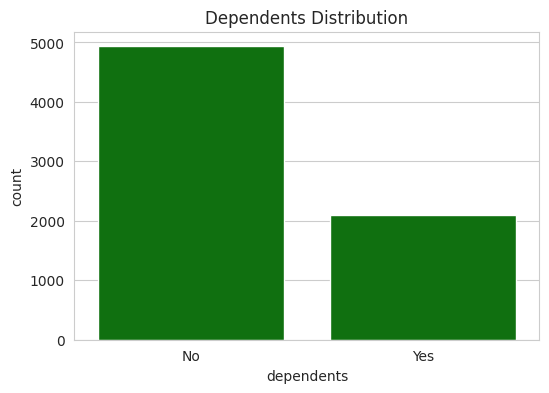

In [41]:
# Chart No. 8 – Dependents Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='dependents', data=df, color='green')
plt.title("Dependents Distribution")
plt.show()


##### **Insight**

*  Majority customers do not have dependents.

*  Customers with dependents form a smaller segment.

*  Feature is moderately imbalanced.

*  ***Having dependents may indicate higher stability (to verify in bivariate).***

#### **Chart 9. Phone Service Distribution**

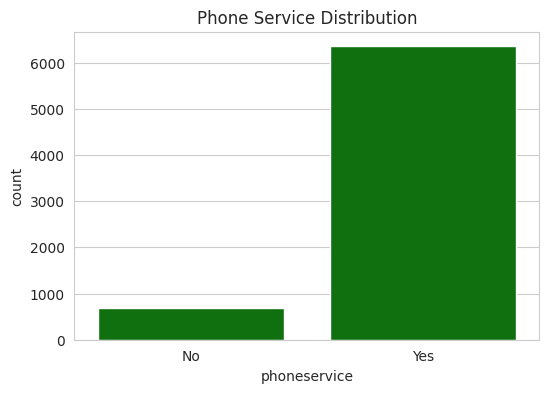

In [42]:
# Chart No. 9 – Phone Service Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='phoneservice', data=df, color='green')
plt.title("Phone Service Distribution")
plt.show()


##### **Insight**

*  Majority customers have phone service.

*  Very small segment without phone service.

*  Highly imbalanced feature.

*  ***Likely not a strong standalone churn driver (to verify later).***

#### **Chart 10. Multiple Lines Distribution**

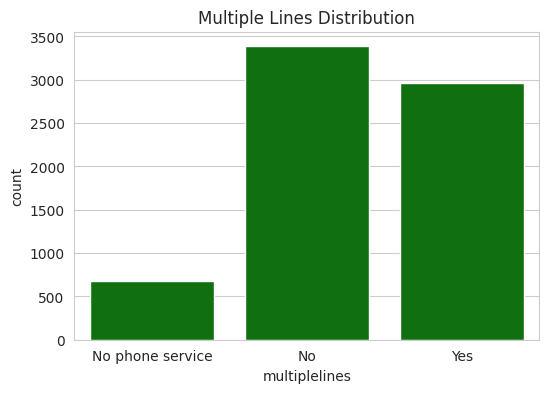

In [43]:
# Chart No. 10 – Multiple Lines Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='multiplelines', data=df, color='green')
plt.title("Multiple Lines Distribution")
plt.show()


##### **Insight**

*  Majority customers either:

  *  Do not have multiple lines, or

  *  Have multiple lines (fairly balanced between Yes/No).

*  Small segment with No phone service.

*  Feature has 3 categories but logically tied to phone service.

*  ***Could impact churn depending on service bundling (to check later).***

#### **Chart 11. Internet Service Distribution**

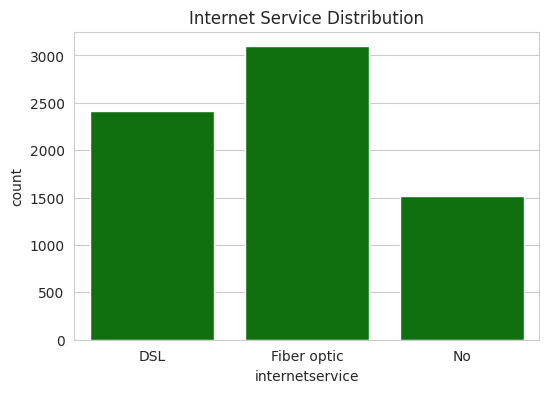

In [44]:
# Chart No. 11 – Internet Service Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='internetservice', data=df, color='green')
plt.title("Internet Service Distribution")
plt.show()

##### **Insight**

*  Majority customers use Fiber optic, followed by DSL.

*  Smaller segment has no internet service.

*  Internet type distribution is fairly spread.

*  Fiber optic being highest may impact churn (pricing/service quality factor).

*  ***Important feature for bivariate analysis with churn.***

#### **Chart 12. Online Security Distribution**

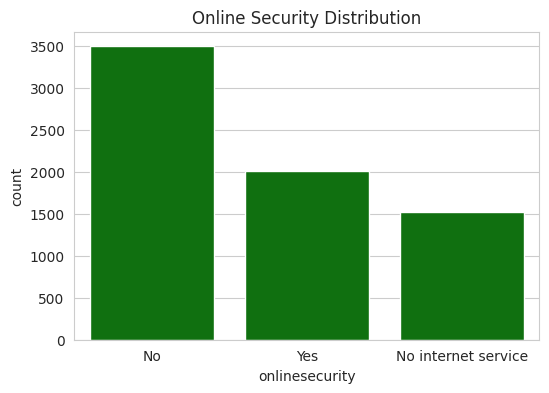

In [45]:
# Chart No. 12 – Online Security Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='onlinesecurity', data=df, color='green')
plt.title("Online Security Distribution")
plt.show()

##### **Insight**

*  Majority customers do not have online security.

*  Smaller portion opted for security service.

*  Some customers have no internet service (expected dependency).

*  Indicates upselling opportunity for security add-on.

*  ***Could be strongly linked with churn behavior (to check in bivariate).***

#### **Chart 13. Online Backup Distribution**

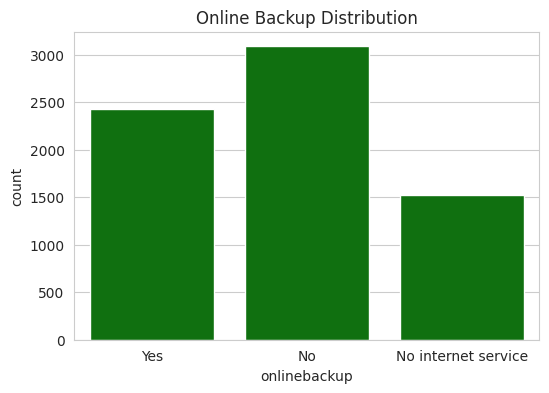

In [46]:
# Chart No. 13 – Online Backup Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='onlinebackup', data=df, color='green')
plt.title("Online Backup Distribution")
plt.show()

##### **Insight**

*  Majority customers do not use online backup.

*  Significant portion has backup enabled.

*  Some customers have no internet service (logical dependency).

*  Add-on adoption is moderate.

*  ***Backup service may influence customer retention (to verify later).***

#### **Chart 14. Device Protection Distribution**

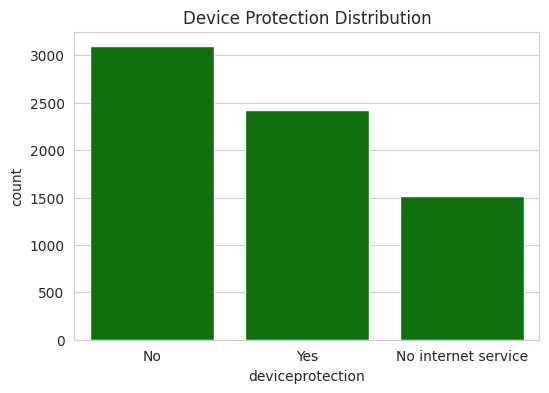

In [47]:
# Chart No. 14 – Device Protection Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='deviceprotection', data=df, color='green')
plt.title("Device Protection Distribution")
plt.show()


##### **Insight**

*  Majority customers do not have device protection.

*  Fair number opted for protection service.

*  Some customers have no internet service (expected link).

*  Similar adoption pattern as online backup.

*  ***Could indicate service bundling behavior.***

#### **Chart 15. Tech Support Distribution**

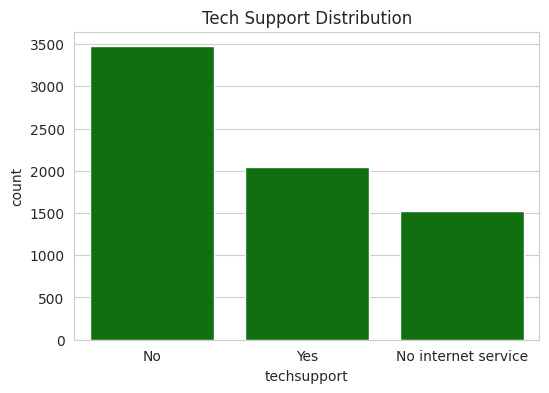

In [48]:
# Chart No. 15 – Tech Support Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='techsupport', data=df, color='green')
plt.title("Tech Support Distribution")
plt.show()


##### **Insight**

*  Majority customers do not use tech support.

*  Smaller segment has active tech support.

*  Some customers have no internet service.

*  Low adoption of support services.

*  ***Tech support may significantly impact churn (service satisfaction factor).***

#### **Chart 16. Streaming TV Distribution**

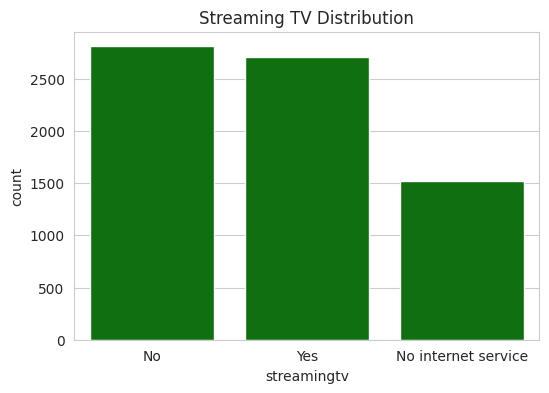

In [49]:
# Chart No. 16 – Streaming TV Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='streamingtv', data=df, color='green')
plt.title("Streaming TV Distribution")
plt.show()



##### **Insight**

*  Fairly balanced between Yes and No users.

*  Significant portion with no internet service.

*  Streaming adoption is moderate.

*  Entertainment services may correlate with higher monthly charges.

*  ***Could influence churn depending on pricing/value perception.***

#### **Chart 17. Streaming Movies Distribution**

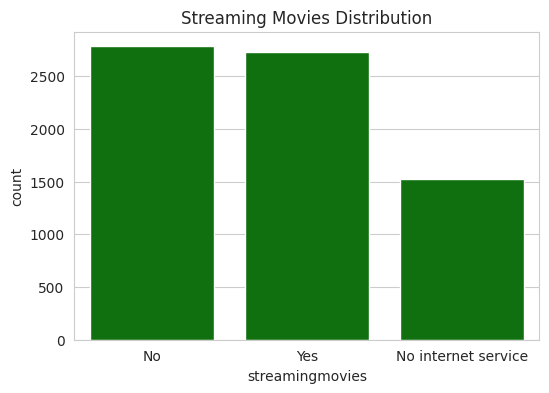

In [51]:
# Chart No. 17 – Streaming Movies Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='streamingmovies', data=df, color='green')
plt.title("Streaming Movies Distribution")
plt.show()

##### **Insight**

*  Distribution almost identical to Streaming TV.

*  Balanced between Yes and No.

*  Significant portion with no internet service.

*  Entertainment services commonly bundled.

*  ***Likely linked with higher monthly charges.***

#### **Chart 18. Contract Distribution**

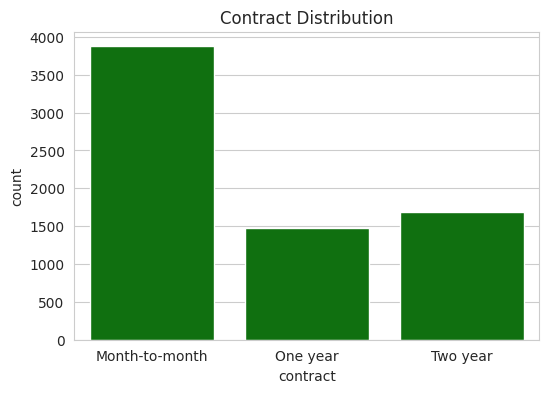

In [52]:
# Chart No. 18 – Contract Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='contract', data=df, color='green')
plt.title("Contract Distribution")
plt.show()

##### **Insight**

*  Majority customers are on Month-to-month contracts.

*  Fewer customers on One-year and Two-year contracts.

*  Indicates flexibility preference among customers.

*  Contract type likely a strong churn driver (month-to-month risk higher).

*  Important feature for bivariate analysis.

#### **Chart 19. Paperless Billing Distribution**

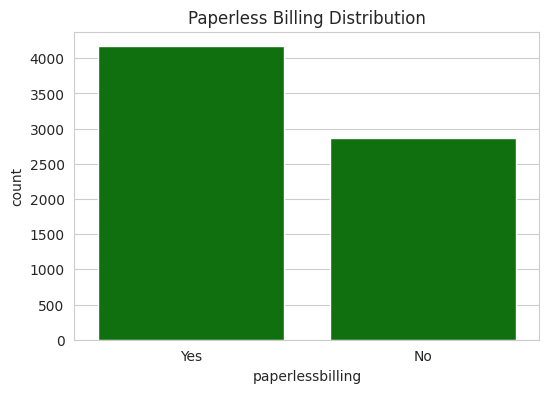

In [53]:
# Chart No. 19 – Paperless Billing Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='paperlessbilling', data=df, color='green')
plt.title("Paperless Billing Distribution")
plt.show()

##### **Insight**

*  Majority customers use paperless billing.

*  Moderate difference between Yes and No.

*  Digital adoption is relatively high.

*  ***Could correlate with payment method and churn behavior.***

#### **Chart 20. Payment Method Distribution**

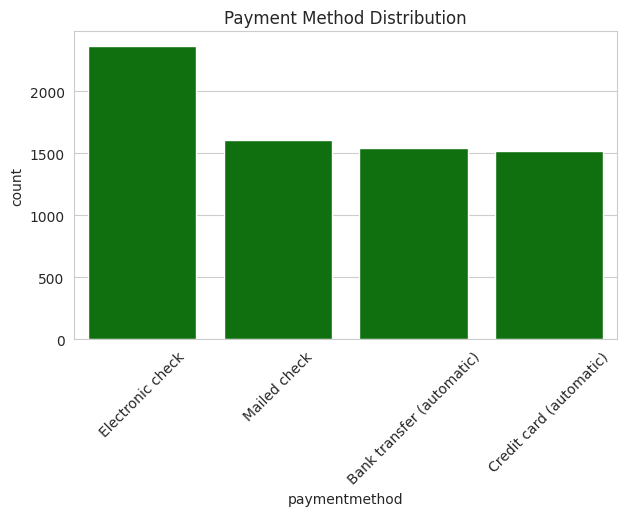

In [54]:
# Chart No. 20 – Payment Method Distribution
plt.figure(figsize=(7,4))
sns.countplot(x='paymentmethod', data=df, color='green')
plt.xticks(rotation=45)
plt.title("Payment Method Distribution")
plt.show()

##### **Insight**

*  Most customers use Electronic check.

*  Other methods (Mailed check, Bank transfer, Credit card) are fairly balanced.

*  Electronic check is clearly dominant.

*  ***Payment method may influence churn (especially non-automatic methods).***

*  ***Automatic payments may indicate higher customer stability.***

#### **Univariate Summary**


**Target Variable**
- Churn distribution is imbalanced (~27% churn).
- Majority customers are retained.


---


**Numerical Features**
- Tenure shows U-shaped distribution (new and long-term customers dominate).
- MonthlyCharges has multiple peaks (basic vs premium plans).
- TotalCharges is right-skewed (driven by tenure and monthly charges).



---



**Categorical Features**
- Gender distribution is balanced.
- Senior citizens form a small segment (~16%).
- Most customers use phone service and internet (fiber optic dominant).
- Add-on services (security, backup, support) have lower adoption.
- Majority customers are on month-to-month contracts.
- Electronic check is the most common payment method.
- Paperless billing adoption is high.



---



**Overall:**
*Dataset shows meaningful variation across service types and contract categories, which may significantly influence churn behavior.*


### **Bivariate Analysis**

#### **Chart 1.  **

##### **Insight**

#### **Chart 1.  **

##### **Insight**

#### **Chart 1.  **

##### **Insight**

#### **Chart 1.  **

##### **Insight**

#### **Chart 1.  **

##### **Insight**

#### **Chart 1.  **

##### **Insight**

#### **Chart 1.  **

##### **Insight**

### **Multivariate Analysis**

#### **Chart 1.  **

##### **Insight**

#### **Chart 1.  **

##### **Insight**

#### **Chart 1.  **

##### **Insight**

#### **Chart 1.  **

##### **Insight**

#### **Chart 1.  **

##### **Insight**

#### **Chart 1.  **

##### **Insight**

#### **Chart 1.  **

##### **Insight**